In [82]:
import pandas as pd
import glob
import os
from pathlib import Path
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Imported necessary libraries")

Imported necessary libraries


In [83]:
def process_all_csv_files(csv_files, max_files=None):
    """
    Process all CSV files and return a combined DataFrame
    """
    all_dataframes = []
    processed_count = 0
    
    files_to_process = csv_files[:max_files] if max_files else csv_files
    
    print(f"Processing {len(files_to_process)} CSV files...")
    print("-" * 50)
    
    for i, file_path in enumerate(files_to_process, 1):
        print(f"Processing file {i}/{len(files_to_process)}: {os.path.basename(file_path)}")
        
        df = process_csv_file(file_path)
        if df is not None and not df.empty:
            all_dataframes.append(df)
            processed_count += 1
        
        # Progress update every 5 files
        if i % 5 == 0:
            print(f"Progress: {i}/{len(files_to_process)} files processed")
    
    if all_dataframes:
        print(f"\nCombining {len(all_dataframes)} dataframes...")
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        print(f"Combined dataset shape: {combined_df.shape}")
        return combined_df
    else:
        print("No valid data found in any files")
        return None

# Process all CSV files
print("Starting to process all CSV files...")
combined_data = process_all_csv_files(csv_files, max_files=10)  # Start with first 10 files

if combined_data is not None:
    print(f"\nFinal dataset info:")
    print(f"Shape: {combined_data.shape}")
    print(f"Columns: {list(combined_data.columns)}")
    print(f"\nFirst few rows:")
    print(combined_data.head())
    
    # Save to a summary file
    output_file = "processed_data_summary.csv"
    combined_data.to_csv(output_file, index=False)
    print(f"\nData saved to {output_file}")

Starting to process all CSV files...
Processing 10 CSV files...
--------------------------------------------------
Processing file 1/10: 02.06.2025 00_00_All measuring points_ExportFile.csv
Processed 02.06.2025 00_00_All measuring points_ExportFile.csv: 80793 rows, 9 columns
Processing file 2/10: 02.06.2025 06_00_All measuring points_ExportFile.csv
Processed 02.06.2025 06_00_All measuring points_ExportFile.csv: 83239 rows, 9 columns
Processing file 3/10: 02.06.2025 12_00_All measuring points_ExportFile.csv
Processed 02.06.2025 12_00_All measuring points_ExportFile.csv: 83455 rows, 9 columns
Processing file 4/10: 02.06.2025 18_00_All measuring points_ExportFile.csv
Processed 02.06.2025 18_00_All measuring points_ExportFile.csv: 88801 rows, 9 columns
Processing file 5/10: 03.06.2025 00_00_All measuring points_ExportFile.csv
Processed 03.06.2025 00_00_All measuring points_ExportFile.csv: 81596 rows, 9 columns
Progress: 5/10 files processed
Processing file 6/10: 03.06.2025 12_00_All measur

In [84]:
def process_csv_file(file_path):
    """
    Process a single CSV file and return a DataFrame with cleaned data
    """
    try:
        # Read the CSV file
        df = pd.read_csv(file_path, sep=';')
        
        # Clean column names (remove extra spaces and special characters)
        df.columns = df.columns.str.strip()
        
        # Extract filename info for metadata
        filename = os.path.basename(file_path)
        date_time_part = filename.split('_All')[0]  # Extract date and time part
        
        # Add metadata columns
        df['source_file'] = filename
        df['file_date_time'] = date_time_part
        
        # Convert Clock column to datetime if it exists
        if 'Clock (8:0-0:1.0.0*255:2)' in df.columns:
            df['datetime'] = pd.to_datetime(df['Clock (8:0-0:1.0.0*255:2)'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
        
        print(f"Processed {filename}: {len(df)} rows, {len(df.columns)} columns")
        return df
        
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def get_sample_data(file_path, n_rows=5):
    """
    Get a sample of data from a CSV file for inspection
    """
    try:
        df_sample = pd.read_csv(file_path, sep=';', nrows=n_rows)
        return df_sample
    except Exception as e:
        print(f"Error reading sample from {file_path}: {str(e)}")
        return None

# Test with the first CSV file
if csv_files:
    print("Sample data from first file:")
    sample_df = get_sample_data(csv_files[0])
    if sample_df is not None:
        print(sample_df.head())
        print(f"\nColumns: {list(sample_df.columns)}")

Sample data from first file:
      Meter Clock (8:0-0:1.0.0*255:2)  \
0  13836498       01.06.2025 12:15:00   
1  13836498       01.06.2025 12:30:00   
2  13836498       01.06.2025 12:45:00   
3  13836498       01.06.2025 13:00:00   
4  13836498       01.06.2025 13:15:00   

   Active Energy Import (3:1-0:1.8.0*255:2)  \
0                                   6517117   
1                                   6517160   
2                                   6517205   
3                                   6517249   
4                                   6517296   

   Active Energy Export (3:1-0:2.8.0*255:2)  TransFullCoef  Unnamed: 5  
0                                       469              1         NaN  
1                                       469              1         NaN  
2                                       469              1         NaN  
3                                       469              1         NaN  
4                                       469              1         NaN  

Co

In [85]:
def get_all_csv_files(data_dir="GicaHack_data"):
    """
    Get all CSV files from the data directory
    """
    csv_pattern = os.path.join(data_dir, "*.csv")
    csv_files = glob.glob(csv_pattern)
    
    # Filter out empty files
    valid_files = []
    for file in csv_files:
        if os.path.getsize(file) > 0:
            valid_files.append(file)
    
    print(f"Found {len(valid_files)} non-empty CSV files out of {len(csv_files)} total files")
    return valid_files

# Get all CSV files
csv_files = get_all_csv_files()
print(f"Files to process: {len(csv_files)}")
for i, file in enumerate(csv_files[:5]):  # Show first 5 files
    print(f"{i+1}. {os.path.basename(file)}")
if len(csv_files) > 5:
    print(f"... and {len(csv_files) - 5} more files")

Found 25 non-empty CSV files out of 28 total files
Files to process: 25
1. 02.06.2025 00_00_All measuring points_ExportFile.csv
2. 02.06.2025 06_00_All measuring points_ExportFile.csv
3. 02.06.2025 12_00_All measuring points_ExportFile.csv
4. 02.06.2025 18_00_All measuring points_ExportFile.csv
5. 03.06.2025 00_00_All measuring points_ExportFile.csv
... and 20 more files


In [86]:
# Optional: Process ALL files (remove max_files limit)
# Uncomment the lines below to process all CSV files at once

print("\nProcessing ALL CSV files (this may take a while)...")
all_data = process_all_csv_files(csv_files)  # No limit

if all_data is not None:
    print(f"\nComplete dataset shape: {all_data.shape}")
    all_data.to_csv("complete_processed_data.csv", index=False)
    print("Complete data saved to complete_processed_data.csv")


Processing ALL CSV files (this may take a while)...
Processing 25 CSV files...
--------------------------------------------------
Processing file 1/25: 02.06.2025 00_00_All measuring points_ExportFile.csv
Processed 02.06.2025 00_00_All measuring points_ExportFile.csv: 80793 rows, 9 columns
Processing file 2/25: 02.06.2025 06_00_All measuring points_ExportFile.csv
Processed 02.06.2025 06_00_All measuring points_ExportFile.csv: 83239 rows, 9 columns
Processing file 3/25: 02.06.2025 12_00_All measuring points_ExportFile.csv
Processed 02.06.2025 12_00_All measuring points_ExportFile.csv: 83455 rows, 9 columns
Processing file 4/25: 02.06.2025 18_00_All measuring points_ExportFile.csv
Processed 02.06.2025 18_00_All measuring points_ExportFile.csv: 88801 rows, 9 columns
Processing file 5/25: 03.06.2025 00_00_All measuring points_ExportFile.csv
Processed 03.06.2025 00_00_All measuring points_ExportFile.csv: 81596 rows, 9 columns
Progress: 5/25 files processed
Processing file 6/25: 03.06.2025 

In [87]:
df = pd.read_csv('complete_processed_data.csv')
df.head()

,Meter,Clock (8:0-0:1.0.0*255:2),Active Energy Import (3:1-0:1.8.0*255:2),Active Energy Export (3:1-0:2.8.0*255:2),TransFullCoef,Unnamed: 5,source_file,file_date_time,datetime
0,13836498,01.06.2025 12:15:00,6517117.0,469.0,1.0,NaN,02.06.2025 00_00_All measuring points_ExportFi...,02.06.2025 00_00,2025-06-01 12:15:00
1,13836498,01.06.2025 12:30:00,6517160.0,469.0,1.0,NaN,02.06.2025 00_00_All measuring points_ExportFi...,02.06.2025 00_00,2025-06-01 12:30:00
2,13836498,01.06.2025 12:45:00,6517205.0,469.0,1.0,NaN,02.06.2025 00_00_All measuring points_ExportFi...,02.06.2025 00_00,2025-06-01 12:45:00
3,13836498,01.06.2025 13:00:00,6517249.0,469.0,1.0,NaN,02.06.2025 00_00_All measuring points_ExportFi...,02.06.2025 00_00,2025-06-01 13:00:00
4,13836498,01.06.2025 13:15:00,6517296.0,469.0,1.0,NaN,02.06.2025 00_00_All measuring points_ExportFi...,02.06.2025 00_00,2025-06-01 13:15:00


In [88]:
df = df[["Meter", "Active Energy Import (3:1-0:1.8.0*255:2)", "Active Energy Export (3:1-0:2.8.0*255:2)", "datetime"]]
df.head()

,Meter,Active Energy Import (3:1-0:1.8.0*255:2),Active Energy Export (3:1-0:2.8.0*255:2),datetime
0,13836498,6517117.0,469.0,2025-06-01 12:15:00
1,13836498,6517160.0,469.0,2025-06-01 12:30:00
2,13836498,6517205.0,469.0,2025-06-01 12:45:00
3,13836498,6517249.0,469.0,2025-06-01 13:00:00
4,13836498,6517296.0,469.0,2025-06-01 13:15:00


In [89]:
# Rename columns for easier analysis
df.columns = ['meter_id', 'energy_import', 'energy_export', 'datetime']
df.head()

,meter_id,energy_import,energy_export,datetime
0,13836498,6517117.0,469.0,2025-06-01 12:15:00
1,13836498,6517160.0,469.0,2025-06-01 12:30:00
2,13836498,6517205.0,469.0,2025-06-01 12:45:00
3,13836498,6517249.0,469.0,2025-06-01 13:00:00
4,13836498,6517296.0,469.0,2025-06-01 13:15:00


In [90]:
df["datetime"] = pd.to_datetime(df["datetime"])
#check if there are errors in datetime conversion
df['datetime'].isnull().sum()

np.int64(0)

In [91]:
# Data Overview and Basic Statistics
print("=== DATA OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Number of unique meters: {df['meter_id'].nunique()}")
print(f"Total time span: {(df['datetime'].max() - df['datetime'].min()).days} days")

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== BASIC STATISTICS ===")
print(df.describe())

=== DATA OVERVIEW ===
Dataset shape: (2254330, 4)
Date range: 2024-10-01 00:00:00 to 2025-06-08 15:00:00
Number of unique meters: 11871
Total time span: 250 days

=== MISSING VALUES ===
meter_id         0
energy_import    1
energy_export    1
datetime         0
dtype: int64

=== BASIC STATISTICS ===
           meter_id  energy_import  energy_export  \
count  2.254330e+06   2.254329e+06   2.254329e+06   
mean   1.479953e+07   1.891856e+06   3.178516e+04   
min    1.383650e+07   7.090000e+02   3.230000e+02   
25%    1.446253e+07   7.383500e+04   3.320000e+02   
50%    1.494766e+07   2.620370e+05   3.430000e+02   
75%    1.499775e+07   1.073603e+06   8.730000e+02   
max    1.500596e+07   4.533874e+08   3.294604e+07   
std    2.445568e+05   1.282997e+07   6.989020e+05   

                            datetime  
count                        2254330  
mean   2025-06-04 10:27:28.368605184  
min              2024-10-01 00:00:00  
25%              2025-06-02 20:00:00  
50%              2025-06-0

In [92]:
# Energy Consumption Analysis
print("=== ENERGY CONSUMPTION ANALYSIS ===")

# Calculate energy differences (consumption between readings)
df_sorted = df.sort_values(['meter_id', 'datetime'])
df_sorted['energy_import_diff'] = df_sorted.groupby('meter_id')['energy_import'].diff()
df_sorted['energy_export_diff'] = df_sorted.groupby('meter_id')['energy_export'].diff()

# Remove negative differences (meter resets or errors)
df_consumption = df_sorted[
    (df_sorted['energy_import_diff'] >= 0) & 
    (df_sorted['energy_export_diff'] >= 0) &
    (df_sorted['energy_import_diff'].notna())
].copy()

print(f"Valid consumption records: {len(df_consumption)}")
print(f"Records with energy import: {(df_consumption['energy_import_diff'] > 0).sum()}")
print(f"Records with energy export: {(df_consumption['energy_export_diff'] > 0).sum()}")

print("\n=== CONSUMPTION STATISTICS ===")
print("Energy Import Differences:")
print(df_consumption['energy_import_diff'].describe())
print("\nEnergy Export Differences:")
print(df_consumption['energy_export_diff'].describe())

# Net energy calculation
df_consumption['net_energy'] = df_consumption['energy_import_diff'] - df_consumption['energy_export_diff']
print("\nNet Energy (Import - Export):")
print(df_consumption['net_energy'].describe())

=== ENERGY CONSUMPTION ANALYSIS ===
Valid consumption records: 2242457
Records with energy import: 1893221
Records with energy export: 15392

=== CONSUMPTION STATISTICS ===
Energy Import Differences:
count    2.242457e+06
mean     2.176822e+02
std      4.216693e+03
min      0.000000e+00
25%      1.200000e+01
50%      5.400000e+01
75%      1.450000e+02
max      2.953920e+06
Name: energy_import_diff, dtype: float64

Energy Export Differences:
count    2.242457e+06
mean     1.225803e+01
std      4.978520e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.037020e+05
Name: energy_export_diff, dtype: float64

Net Energy (Import - Export):
count    2.242457e+06
mean     2.054242e+02
std      4.242406e+03
min     -2.146880e+05
25%      1.200000e+01
50%      5.400000e+01
75%      1.450000e+02
max      2.953920e+06
Name: net_energy, dtype: float64


In [93]:
# Calculate actual consumption by finding differences between consecutive readings
# Sort by meter and datetime to ensure proper order
df = df.sort_values(['meter_id', 'datetime'])

# Calculate differences (actual consumption) for each meter
df['import_consumption'] = df.groupby('meter_id')['energy_import'].diff()
df['export_consumption'] = df.groupby('meter_id')['energy_export'].diff()

# Remove negative values (meter resets) and NaN values
df = df.dropna(subset=['import_consumption', 'export_consumption'])
df = df[(df['import_consumption'] >= 0) & (df['export_consumption'] >= 0)]

print("Actual consumption calculated from cumulative meter readings")
print(f"Records after processing: {len(df)}")
print("\nSample of actual consumption data:")
df[['meter_id', 'datetime', 'import_consumption', 'export_consumption']].head(10)

Actual consumption calculated from cumulative meter readings
Records after processing: 2242457

Sample of actual consumption data:


,meter_id,datetime,import_consumption,export_consumption
1,13836498,2025-06-01 12:30:00,43.0,0.0
2,13836498,2025-06-01 12:45:00,45.0,0.0
3,13836498,2025-06-01 13:00:00,44.0,0.0
4,13836498,2025-06-01 13:15:00,47.0,0.0
5,13836498,2025-06-01 13:30:00,44.0,0.0
6,13836498,2025-06-01 13:45:00,44.0,0.0
7,13836498,2025-06-01 14:00:00,43.0,0.0
8,13836498,2025-06-01 14:15:00,45.0,0.0
9,13836498,2025-06-01 14:30:00,45.0,0.0
10,13836498,2025-06-01 14:45:00,44.0,0.0


In [94]:
df.sort_values('import_consumption', ascending=False).head(10)

,meter_id,energy_import,energy_export,datetime,import_consumption,export_consumption
444605,14381640,18625742.0,2706.0,2025-01-01,2953920.0,0.0
629478,14462764,7022904.0,901.0,2025-03-01,2010308.0,0.0
444606,14381640,20360792.0,2706.0,2025-02-01,1735050.0,0.0
444607,14381640,21989587.0,2706.0,2025-03-01,1628795.0,0.0
444608,14381640,23612424.0,2706.0,2025-04-01,1622837.0,0.0
444609,14381640,25024064.0,2706.0,2025-05-01,1411640.0,0.0
621659,14381729,5001151.0,2698.0,2025-05-25,1264345.0,0.0
629479,14462764,8235979.0,901.0,2025-04-01,1213075.0,0.0
448702,14462016,2077743.0,856.0,2025-05-04,971980.0,0.0
446565,14461074,3034970.0,899.0,2025-02-01,929846.0,0.0


In [95]:
# Calculate actual consumption by finding differences between consecutive readings
# Sort by meter and datetime to ensure proper order
df = df.sort_values(['meter_id', 'datetime'])

# Calculate differences (actual consumption) for each meter
df['import_consumption'] = df.groupby('meter_id')['energy_import'].diff()
df['export_consumption'] = df.groupby('meter_id')['energy_export'].diff()

# Remove negative values (meter resets) and NaN values
df = df.dropna(subset=['import_consumption', 'export_consumption'])
df = df[(df['import_consumption'] >= 0) & (df['export_consumption'] >= 0)]

print("Actual consumption calculated from cumulative meter readings")
print(f"Records after processing: {len(df)}")
print("\nSample of actual consumption data:")
df[['meter_id', 'datetime', 'import_consumption', 'export_consumption']].head(10)

Actual consumption calculated from cumulative meter readings
Records after processing: 2230642

Sample of actual consumption data:


,meter_id,datetime,import_consumption,export_consumption
2,13836498,2025-06-01 12:45:00,45.0,0.0
3,13836498,2025-06-01 13:00:00,44.0,0.0
4,13836498,2025-06-01 13:15:00,47.0,0.0
5,13836498,2025-06-01 13:30:00,44.0,0.0
6,13836498,2025-06-01 13:45:00,44.0,0.0
7,13836498,2025-06-01 14:00:00,43.0,0.0
8,13836498,2025-06-01 14:15:00,45.0,0.0
9,13836498,2025-06-01 14:30:00,45.0,0.0
10,13836498,2025-06-01 14:45:00,44.0,0.0
11,13836498,2025-06-01 15:00:00,43.0,0.0


In [96]:
# Time Series Analysis of Actual Consumption
print("=== TIME SERIES ANALYSIS ===")

# Add time-based features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['date'] = df['datetime'].dt.date

# Calculate net consumption (import - export)
df['net_consumption'] = df['import_consumption'] - df['export_consumption']

print("=== CONSUMPTION STATISTICS ===")
print("Import Consumption:")
print(df['import_consumption'].describe())
print("\nExport Consumption:")
print(df['export_consumption'].describe())
print("\nNet Consumption (Import - Export):")
print(df['net_consumption'].describe())

# Hourly consumption patterns
print("\n=== HOURLY CONSUMPTION PATTERNS ===")
hourly_consumption = df.groupby('hour').agg({
    'import_consumption': ['mean', 'sum'],
    'export_consumption': ['mean', 'sum'],
    'net_consumption': ['mean', 'sum']
}).round(3)

print(hourly_consumption)

# Peak consumption analysis
peak_import_hour = df.groupby('hour')['import_consumption'].sum().idxmax()
peak_export_hour = df.groupby('hour')['export_consumption'].sum().idxmax()
peak_net_hour = df.groupby('hour')['net_consumption'].sum().idxmax()

print(f"\nPeak import consumption hour: {peak_import_hour}:00")
print(f"Peak export consumption hour: {peak_export_hour}:00") 
print(f"Peak net consumption hour: {peak_net_hour}:00")

=== TIME SERIES ANALYSIS ===
=== CONSUMPTION STATISTICS ===
Import Consumption:
count    2.230642e+06
mean     2.122560e+02
std      3.435542e+03
min      0.000000e+00
25%      1.200000e+01
50%      5.400000e+01
75%      1.450000e+02
max      1.735050e+06
Name: import_consumption, dtype: float64

Export Consumption:
count    2.230642e+06
mean     1.218066e+01
std      4.980828e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.037020e+05
Name: export_consumption, dtype: float64

Net Consumption (Import - Export):
count    2.230642e+06
mean     2.000753e+02
std      3.467059e+03
min     -2.146880e+05
25%      1.200000e+01
50%      5.400000e+01
75%      1.440000e+02
max      1.735050e+06
Name: net_consumption, dtype: float64

=== HOURLY CONSUMPTION PATTERNS ===
     import_consumption             export_consumption             \
                   mean         sum               mean        sum   
hour                                    

In [97]:
# Meter-wise Analysis
print("=== METER-WISE ANALYSIS ===")

# Individual meter statistics
meter_stats = df.groupby('meter_id').agg({
    'import_consumption': ['count', 'sum', 'mean', 'max'],
    'export_consumption': ['sum', 'mean', 'max'],
    'net_consumption': ['sum', 'mean', 'min', 'max']
}).round(3)

print("Meter-wise consumption statistics:")
print(meter_stats)

# Top consumers and producers
print("\n=== TOP ENERGY CONSUMERS ===")
top_importers = df.groupby('meter_id')['import_consumption'].sum().sort_values(ascending=False).head(10)
print(top_importers)

print("\n=== TOP ENERGY EXPORTERS ===")
top_exporters = df.groupby('meter_id')['export_consumption'].sum().sort_values(ascending=False).head(10)
print(top_exporters)

print("\n=== NET ENERGY BALANCE ===")
net_balance = df.groupby('meter_id')['net_consumption'].sum().sort_values(ascending=False)
print("Top net consumers (positive = more import than export):")
print(net_balance.head(10))
print("\nTop net producers (negative = more export than import):")
print(net_balance.tail(10))

# Meter behavior classification
total_import = df.groupby('meter_id')['import_consumption'].sum()
total_export = df.groupby('meter_id')['export_consumption'].sum()

consumer_only = total_import[(total_import > 0) & (total_export == 0)]
producer_only = total_export[(total_export > 0) & (total_import == 0)]
prosumer = total_import[(total_import > 0) & (total_export > 0)]

print(f"\n=== METER CLASSIFICATION ===")
print(f"Consumer-only meters: {len(consumer_only)}")
print(f"Producer-only meters: {len(producer_only)}")
print(f"Prosumer meters (both import/export): {len(prosumer)}")
print(f"Total active meters: {df['meter_id'].nunique()}")

=== METER-WISE ANALYSIS ===
Meter-wise consumption statistics:
         import_consumption                              export_consumption  \
                      count        sum      mean     max                sum   
meter_id                                                                      
13836498                670    51380.0    76.687   234.0                0.0   
14098248                622  1128740.0  1814.695  5660.0                0.0   
14101503                317    26966.0    85.066  3605.0                0.0   
14101511                621    87007.0   140.108  7045.0                0.0   
14101513                670   141492.0   211.182   339.0                0.0   
...                     ...        ...       ...     ...                ...   
15005950                152    18218.0   119.855  1829.0                0.0   
15005952                155     1277.0     8.239    98.0                0.0   
15005953                154        0.0     0.000     0.0            

=== DATA VISUALIZATION ===


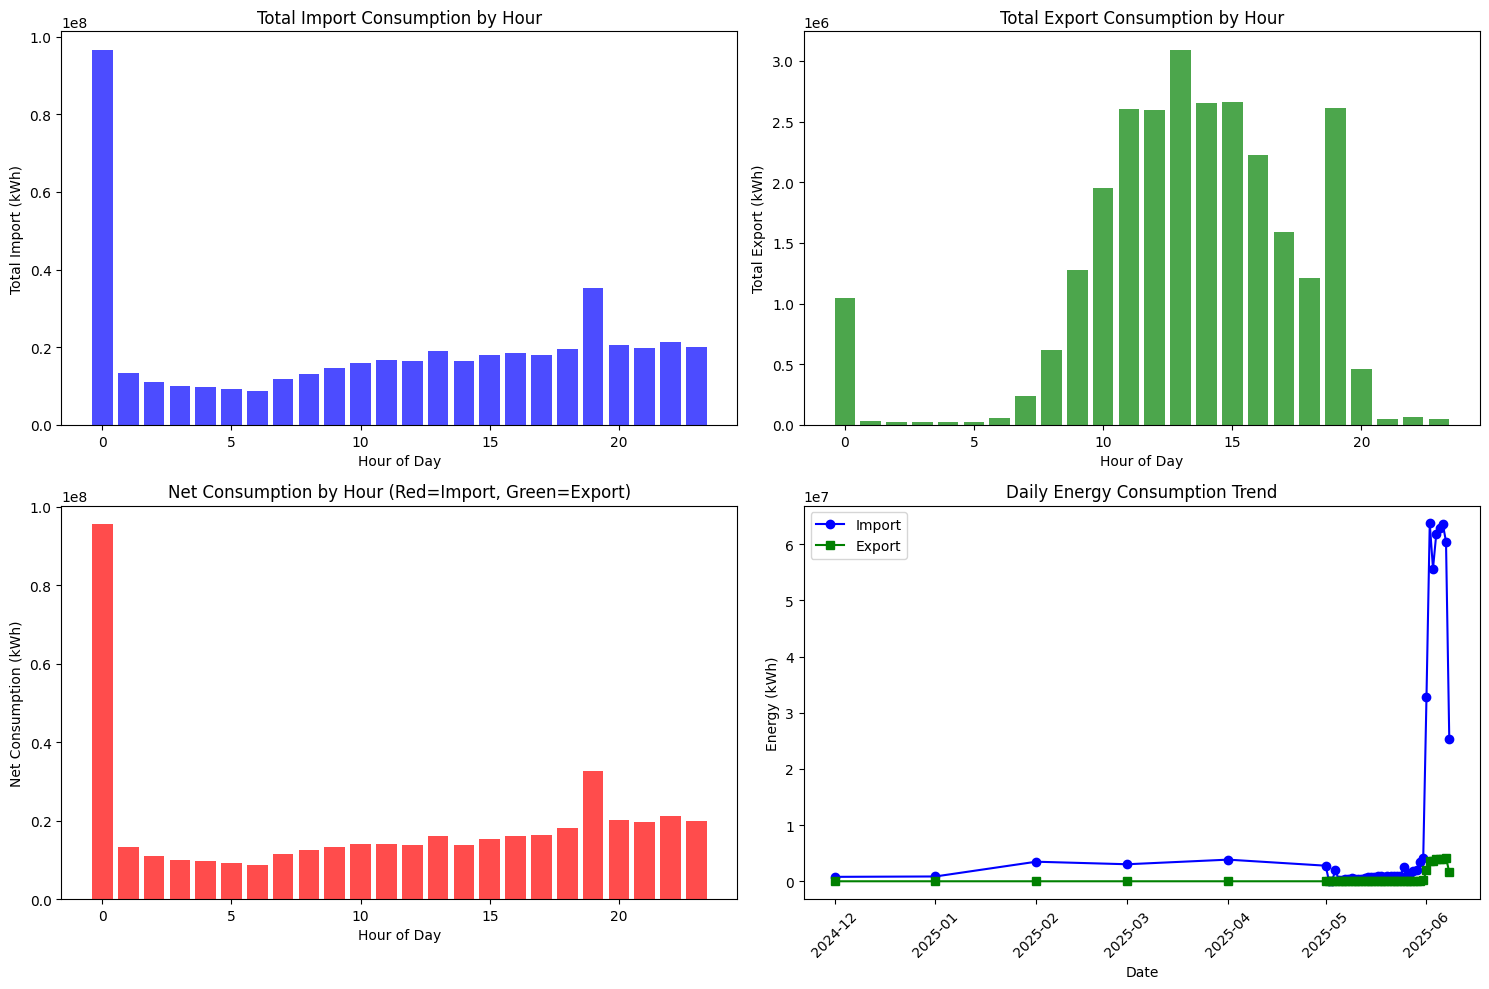

Visualizations created successfully!


In [98]:
# Basic Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

print("=== DATA VISUALIZATION ===")

# 1. Hourly consumption patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly import consumption
hourly_import = df.groupby('hour')['import_consumption'].sum()
axes[0,0].bar(hourly_import.index, hourly_import.values, color='blue', alpha=0.7)
axes[0,0].set_title('Total Import Consumption by Hour')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Total Import (kWh)')

# Hourly export consumption  
hourly_export = df.groupby('hour')['export_consumption'].sum()
axes[0,1].bar(hourly_export.index, hourly_export.values, color='green', alpha=0.7)
axes[0,1].set_title('Total Export Consumption by Hour')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Total Export (kWh)')

# Net consumption by hour
hourly_net = df.groupby('hour')['net_consumption'].sum()
axes[1,0].bar(hourly_net.index, hourly_net.values, color=['red' if x > 0 else 'green' for x in hourly_net.values], alpha=0.7)
axes[1,0].set_title('Net Consumption by Hour (Red=Import, Green=Export)')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Net Consumption (kWh)')

# Daily consumption trend
daily_consumption = df.groupby('date').agg({
    'import_consumption': 'sum',
    'export_consumption': 'sum',
    'net_consumption': 'sum'
})

axes[1,1].plot(daily_consumption.index, daily_consumption['import_consumption'], 
               label='Import', color='blue', marker='o')
axes[1,1].plot(daily_consumption.index, daily_consumption['export_consumption'], 
               label='Export', color='green', marker='s')
axes[1,1].set_title('Daily Energy Consumption Trend')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Energy (kWh)')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")

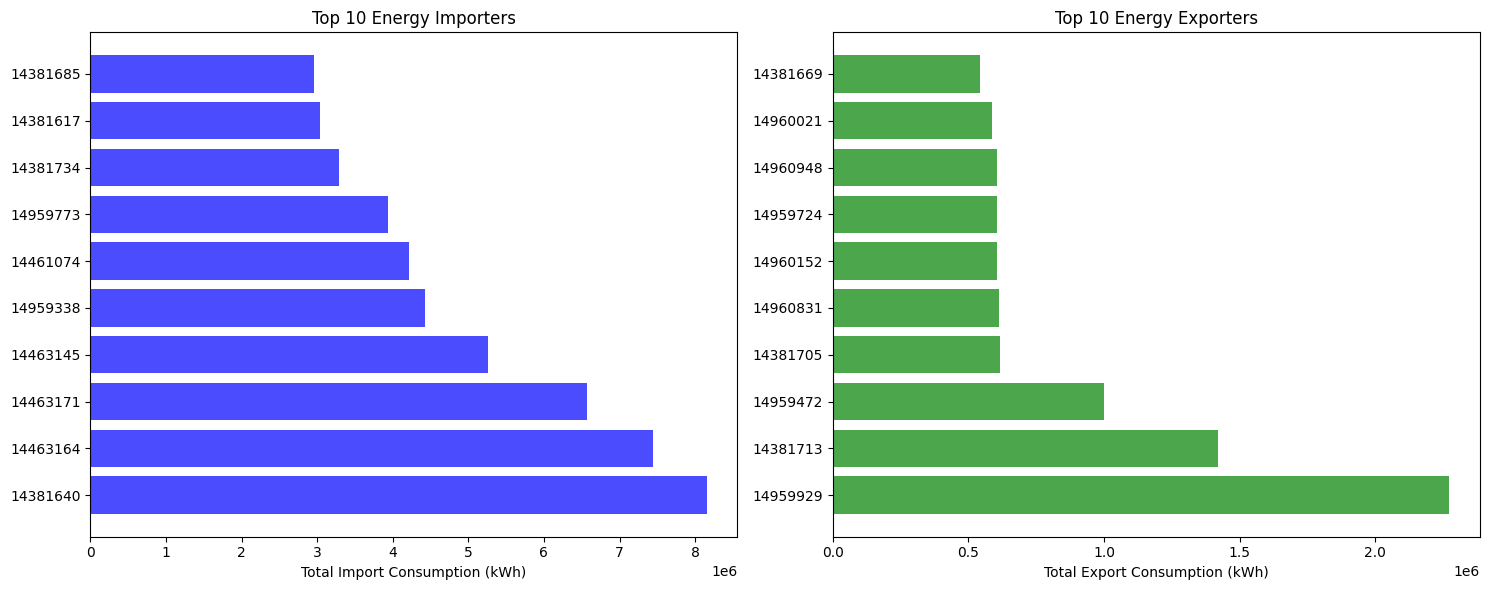

Additional visualizations created!


In [99]:
# Additional Analysis - Top Consumers/Producers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top 10 energy importers
top_10_importers = df.groupby('meter_id')['import_consumption'].sum().sort_values(ascending=False).head(10)
axes[0].barh(range(len(top_10_importers)), top_10_importers.values, color='blue', alpha=0.7)
axes[0].set_yticks(range(len(top_10_importers)))
axes[0].set_yticklabels(top_10_importers.index)
axes[0].set_title('Top 10 Energy Importers')
axes[0].set_xlabel('Total Import Consumption (kWh)')

# Top 10 energy exporters
top_10_exporters = df.groupby('meter_id')['export_consumption'].sum().sort_values(ascending=False).head(10)
if len(top_10_exporters) > 0:
    axes[1].barh(range(len(top_10_exporters)), top_10_exporters.values, color='green', alpha=0.7)
    axes[1].set_yticks(range(len(top_10_exporters)))
    axes[1].set_yticklabels(top_10_exporters.index)
    axes[1].set_title('Top 10 Energy Exporters')
    axes[1].set_xlabel('Total Export Consumption (kWh)')
else:
    axes[1].text(0.5, 0.5, 'No Export Data Available', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Top 10 Energy Exporters')

plt.tight_layout()
plt.show()

print("Additional visualizations created!")

In [100]:
# Select top 3 meters by import and top 3 by export based on number of entries
# Ignore rows with 0 import or export
df_import_only = df[df['import_consumption'] > 0]        
df_export_only = df[df['export_consumption'] > 0]        

import_counts = df_import_only.groupby('meter_id')['import_consumption'].count().sort_values(ascending=False)      
export_counts = df_export_only.groupby('meter_id')['export_consumption'].count().sort_values(ascending=False)      

top_3_import_meters = import_counts.head(3).index        
top_3_export_meters = export_counts.head(3).index        

print("Top 3 meters by import entry count (excluding 0   values):")
print(import_counts.head(3))

print("\nTop 3 meters by export entry count (excluding 0 values):")
print(export_counts.head(3))

# Combine both lists and get unique meters
selected_meters = list(set(top_3_import_meters) |        set(top_3_export_meters))
print(f"\nSelected meters for analysis: {selected_meters}")

# Filter dataframe to only include these meters
df_filtered = df[df['meter_id'].isin(selected_meters)].copy()
print(f"\nFiltered dataset shape: {df_filtered.shape}")  
print(f"Original dataset shape: {df.shape}")

Top 3 meters by import entry count (excluding 0   values):
meter_id
14461598    1376
14461563    1354
14462354    1331
Name: import_consumption, dtype: int64

Top 3 meters by export entry count (excluding 0 values):
meter_id
14463211    645
14381705    366
14381713    366
Name: export_consumption, dtype: int64

Selected meters for analysis: [14381713, 14462354, 14381705, 14461563, 14461598, 14463211]

Filtered dataset shape: (5966, 10)
Original dataset shape: (2230642, 10)


In [101]:
df_filtered.describe()

,meter_id,energy_import,energy_export,datetime,import_consumption,export_consumption,hour,day,net_consumption
count,5.966000e+03,5.966000e+03,5.966000e+03,5966,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,1.444534e+07,4.784162e+06,3.358115e+06,2025-06-02 11:35:54.961448448,79.385350,341.580959,11.442005,12.112974,-262.195608
min,1.438170e+07,9.762660e+05,8.590000e+02,2025-05-25 03:45:00,0.000000,0.000000,0.000000,1.000000,-211896.000000
25%,1.446156e+07,1.454084e+06,8.600000e+02,2025-05-30 09:48:45,8.000000,0.000000,5.000000,4.000000,6.000000
50%,1.446160e+07,2.828534e+06,9.590000e+02,2025-06-03 01:15:00,20.000000,0.000000,11.000000,6.000000,20.000000
75%,1.446235e+07,3.285059e+06,7.080425e+04,2025-06-05 19:00:00,49.750000,0.000000,18.000000,26.000000,46.000000
max,1.446321e+07,2.746234e+07,3.294604e+07,2025-06-08 12:00:00,6114.000000,213737.000000,23.000000,31.000000,1560.000000
std,3.258552e+04,7.650932e+06,9.714674e+06,NaN,186.412573,3017.451412,6.993680,11.321825,2993.704707


In [102]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 25337 to 2098184
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   meter_id            5966 non-null   int64         
 1   energy_import       5966 non-null   float64       
 2   energy_export       5966 non-null   float64       
 3   datetime            5966 non-null   datetime64[ns]
 4   import_consumption  5966 non-null   float64       
 5   export_consumption  5966 non-null   float64       
 6   hour                5966 non-null   int32         
 7   day                 5966 non-null   int32         
 8   date                5966 non-null   object        
 9   net_consumption     5966 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1)
memory usage: 466.1+ KB


In [103]:
df_filtered = df_filtered[df_filtered['import_consumption'] <= 1500] 

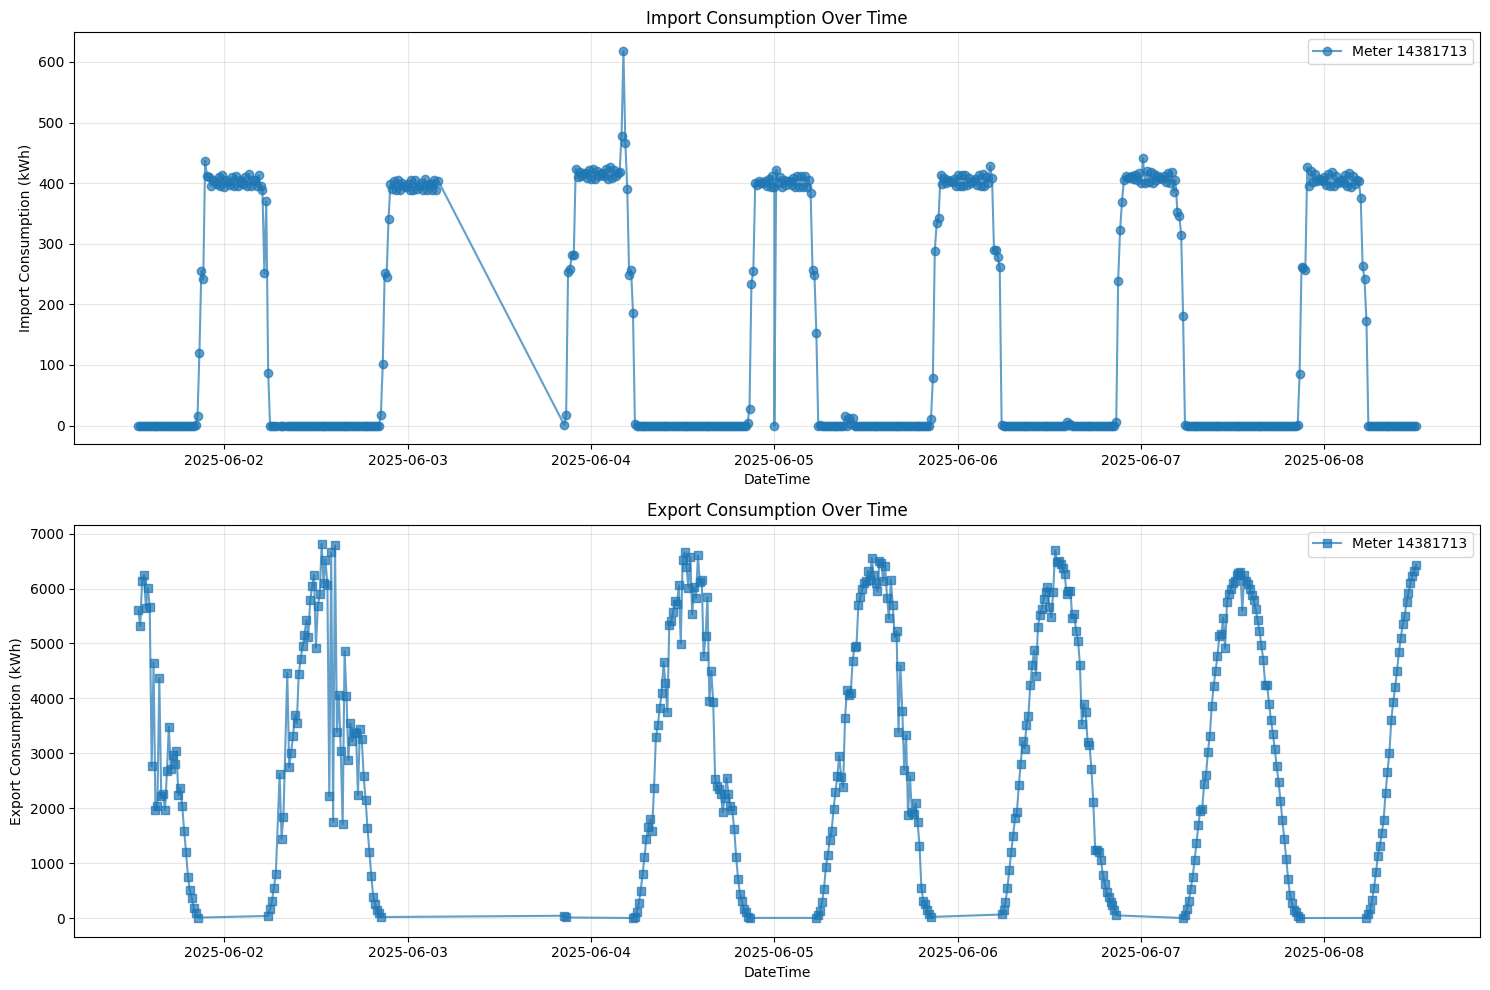

In [104]:
# Visualization of import and export for selected meters
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

selected_meter = [14381713]        

# Plot import consumption over time
for meter in selected_meter:
    meter_data = df_filtered[df_filtered['meter_id'] ==  meter]
    axes[0].plot(meter_data['datetime'],meter_data['import_consumption'],label=f'Meter {meter}', marker='o', alpha=0.7)

axes[0].set_title('Import Consumption Over Time')        
axes[0].set_xlabel('DateTime')
axes[0].set_ylabel('Import Consumption (kWh)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot export consumption over time
for meter in selected_meter:
    meter_data = df_filtered[df_filtered['meter_id'] == meter]
    export_data = meter_data[meter_data['export_consumption'] > 0]
    if len(export_data) > 0:
        axes[1].plot(export_data['datetime'], export_data['export_consumption'], label=f'Meter {meter}', marker='s', alpha=0.7)

axes[1].set_title('Export Consumption Over Time')        
axes[1].set_xlabel('DateTime')
axes[1].set_ylabel('Export Consumption (kWh)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

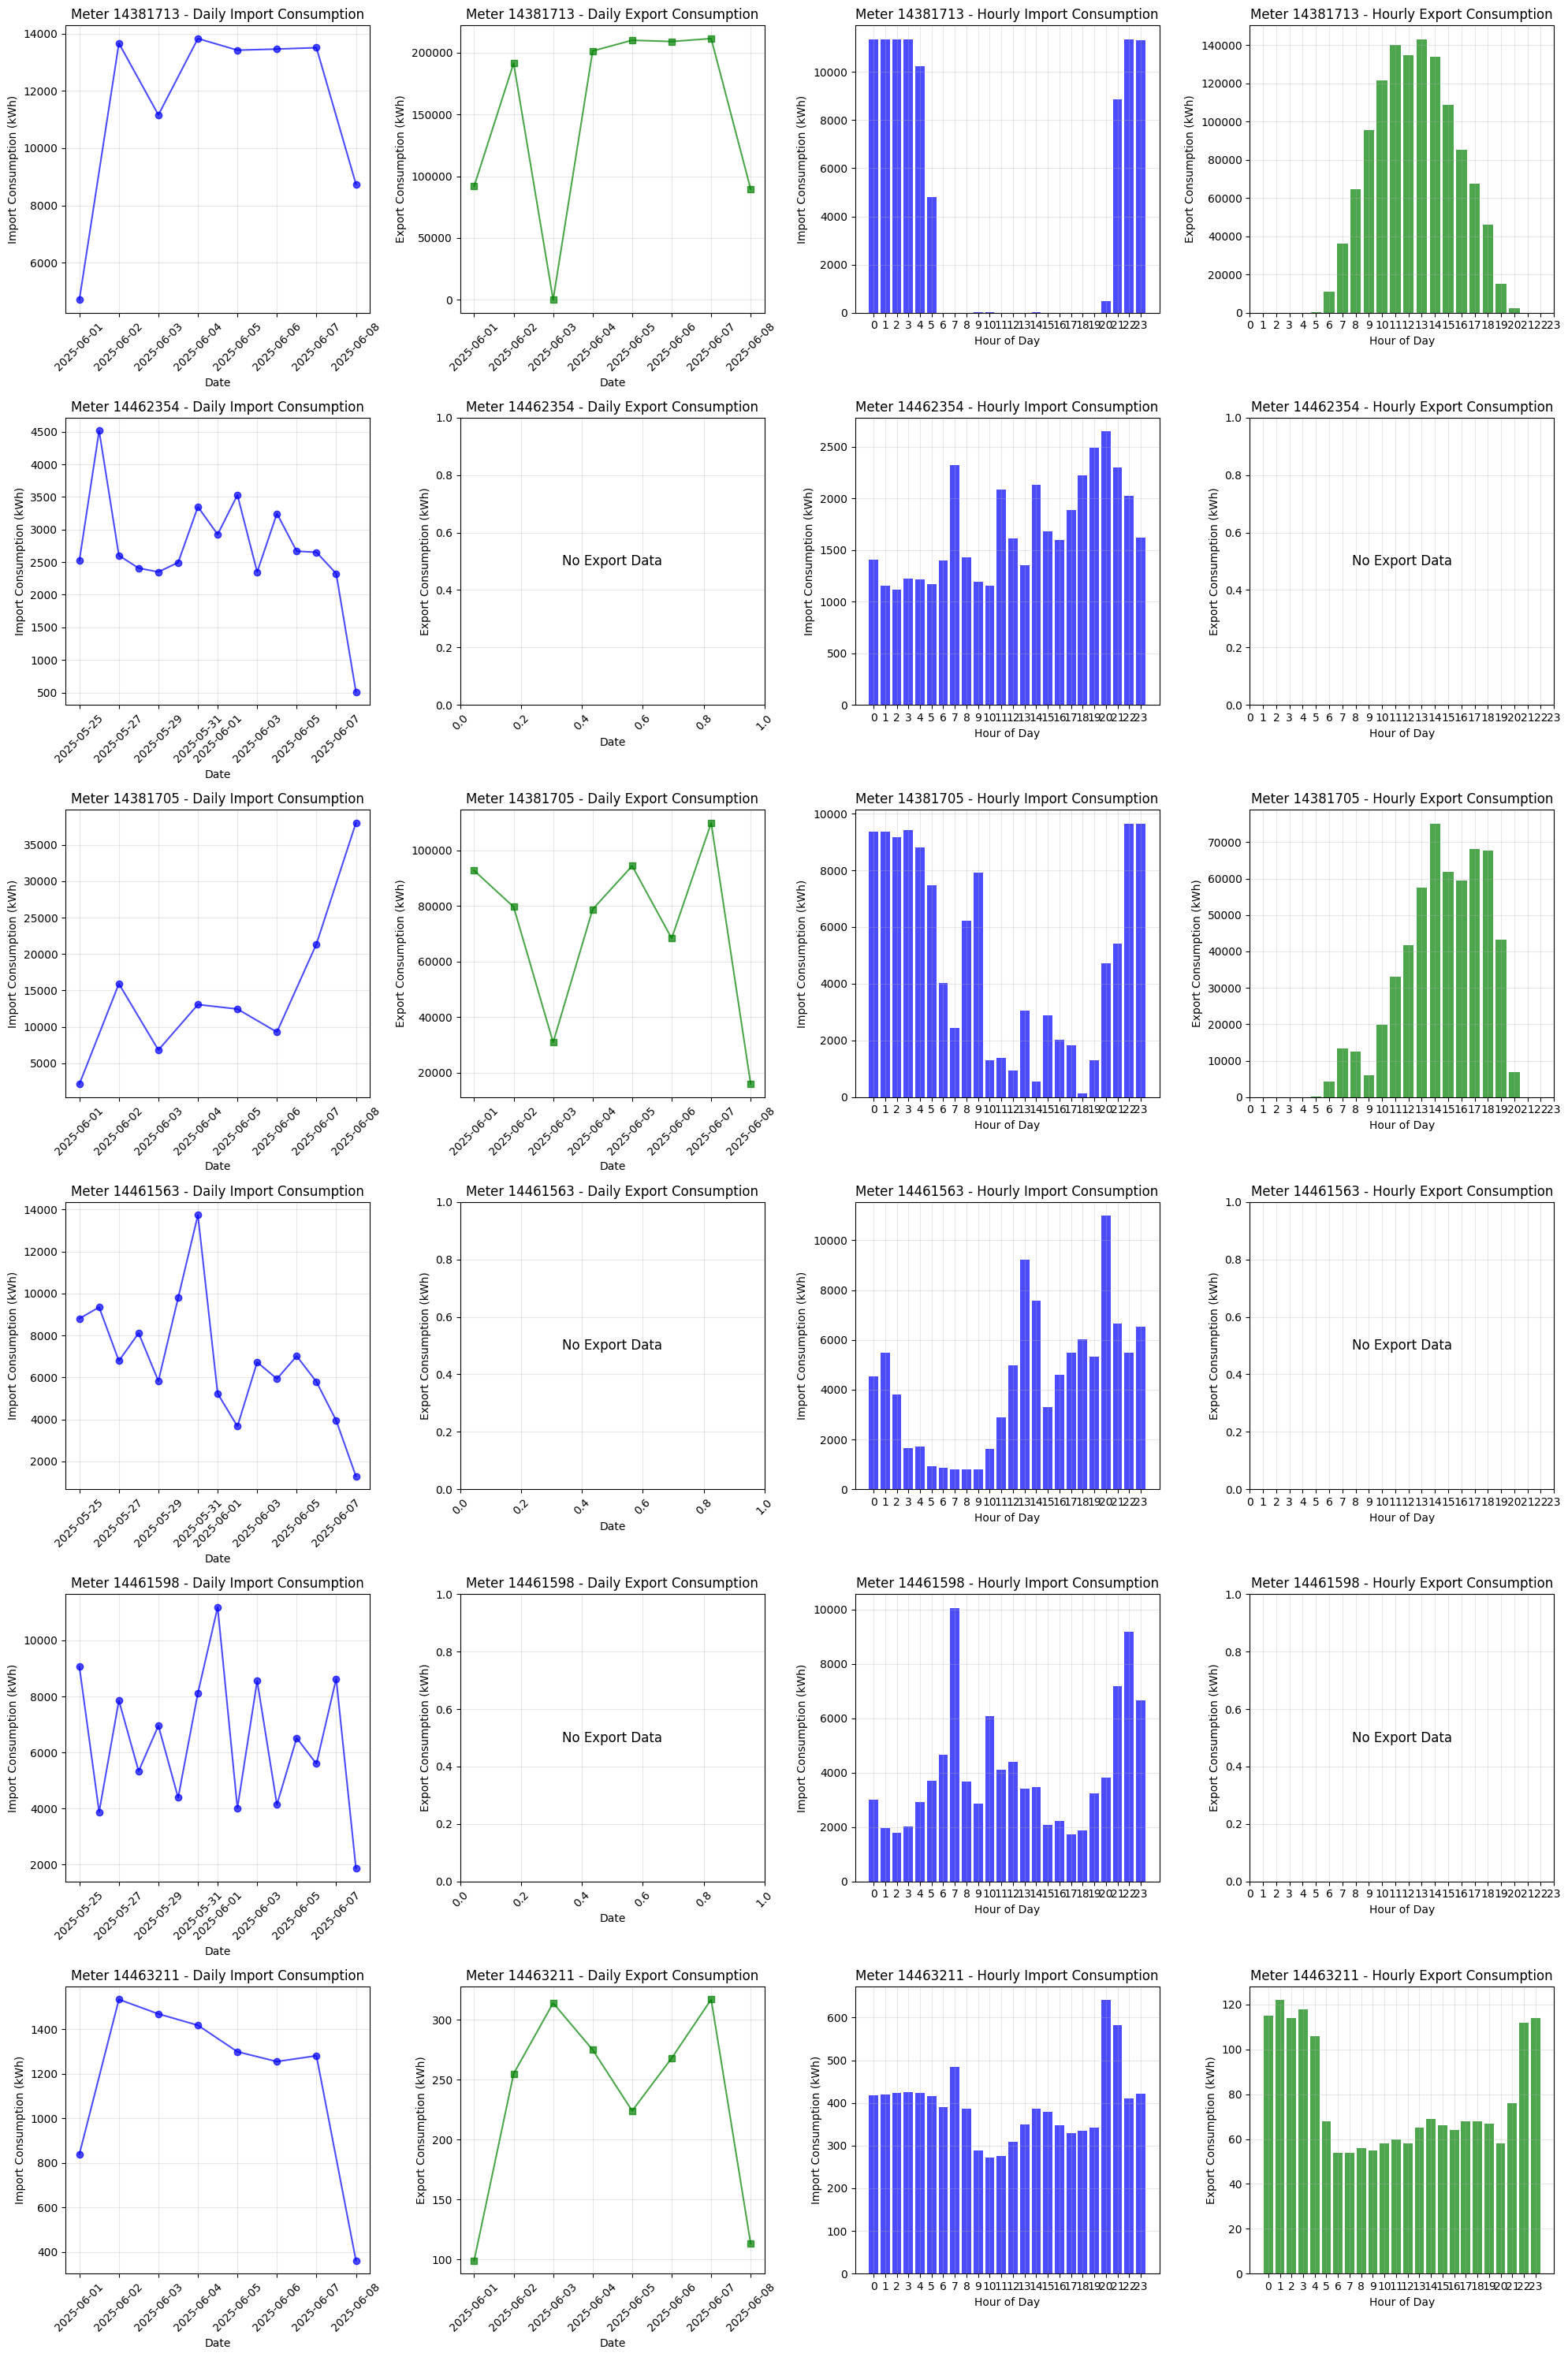

In [105]:
# Visualization of import and export by day and hour for each selected meter separately
import matplotlib.pyplot as plt

# Create subplots for each meter (2 plots per meter: day level and hour level)
num_meters = len(selected_meters)
fig, axes = plt.subplots(num_meters, 4, figsize=(20, 5*num_meters))

# If only one meter, make axes 2D
if num_meters == 1:
    axes = axes.reshape(1, -1)

for i, meter in enumerate(selected_meters):
    meter_data = df_filtered[df_filtered['meter_id'] == meter]

    # Daily level aggregation
    daily_import = meter_data.groupby('date')['import_consumption'].sum()   
    export_data = meter_data[meter_data['export_consumption'] > 0]
    daily_export = export_data.groupby('date')['export_consumption'].sum()  

    # Hourly level aggregation
    hourly_import = meter_data.groupby('hour')['import_consumption'].sum()   
    hourly_export = export_data.groupby('hour')['export_consumption'].sum()  

    # Plot daily import consumption
    axes[i, 0].plot(daily_import.index, daily_import.values, color='blue', marker='o', alpha=0.7) 
    axes[i, 0].set_title(f'Meter {meter} - Daily Import Consumption')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Import Consumption (kWh)')    
    axes[i, 0].tick_params(axis='x', rotation=45)        
    axes[i, 0].grid(True, alpha=0.3)

    # Plot daily export consumption
    if len(daily_export) > 0:
        axes[i, 1].plot(daily_export.index, daily_export.values, color='green', marker='s', alpha=0.7)
        axes[i, 1].set_title(f'Meter {meter} - Daily Export Consumption')
    else:
        axes[i, 1].text(0.5, 0.5, 'No Export Data', ha='center', va='center', transform=axes[i, 1].transAxes, fontsize=12)
        axes[i, 1].set_title(f'Meter {meter} - Daily Export Consumption')

    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Export Consumption (kWh)')    
    axes[i, 1].tick_params(axis='x', rotation=45)        
    axes[i, 1].grid(True, alpha=0.3)

    # Plot hourly import consumption
    axes[i, 2].bar(hourly_import.index, hourly_import.values, color='blue', alpha=0.7)
    axes[i, 2].set_title(f'Meter {meter} - Hourly Import Consumption')
    axes[i, 2].set_xlabel('Hour of Day')
    axes[i, 2].set_ylabel('Import Consumption (kWh)')    
    axes[i, 2].set_xticks(range(0, 24))
    axes[i, 2].grid(True, alpha=0.3)

    # Plot hourly export consumption
    if len(hourly_export) > 0:
        axes[i, 3].bar(hourly_export.index, hourly_export.values, color='green', alpha=0.7)
        axes[i, 3].set_title(f'Meter {meter} - Hourly Export Consumption')
    else:
        axes[i, 3].text(0.5, 0.5, 'No Export Data', ha='center', va='center', transform=axes[i, 3].transAxes, fontsize=12)
        axes[i, 3].set_title(f'Meter {meter} - Hourly Export Consumption')

    axes[i, 3].set_xlabel('Hour of Day')
    axes[i, 3].set_ylabel('Export Consumption (kWh)')    
    axes[i, 3].set_xticks(range(0, 24))
    axes[i, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [106]:
meter_data

,meter_id,energy_import,energy_export,datetime,import_consumption,export_consumption,hour,day,date,net_consumption
17923,14463211,976266.0,69722.0,2025-06-01 12:45:00,15.0,2.0,12,1,2025-06-01,13.0
17924,14463211,976278.0,69725.0,2025-06-01 13:00:00,12.0,3.0,13,1,2025-06-01,9.0
17925,14463211,976289.0,69727.0,2025-06-01 13:15:00,11.0,2.0,13,1,2025-06-01,9.0
17926,14463211,976302.0,69730.0,2025-06-01 13:30:00,13.0,3.0,13,1,2025-06-01,10.0
17927,14463211,976314.0,69732.0,2025-06-01 13:45:00,12.0,2.0,13,1,2025-06-01,10.0
...,...,...,...,...,...,...,...,...,...,...
2098180,14463211,985653.0,71576.0,2025-06-08 05:00:00,14.0,3.0,5,8,2025-06-08,11.0
2098181,14463211,985666.0,71578.0,2025-06-08 05:15:00,13.0,2.0,5,8,2025-06-08,11.0
2098182,14463211,985681.0,71581.0,2025-06-08 05:30:00,15.0,3.0,5,8,2025-06-08,12.0
2098183,14463211,985694.0,71583.0,2025-06-08 05:45:00,13.0,2.0,5,8,2025-06-08,11.0


In [110]:
def calculate_old_tariff_price(df, price_per_watt):
    """
    Calculate price using old tariff structure
    Old tariff:
    - from 7 to 23 - coefficient 1.1
    - from 0 to 7 and 23 to 24 - coefficient 0.9
    """
    # Calculate net consumption (import - export)
    net_consumption = df['import_consumption'] - df['export_consumption']
    
    # Apply old tariff coefficients based on hour
    coefficients = df['hour'].apply(lambda x: 1.1 if 7 <= x < 23 else 0.9)
    
    # Calculate price in lei
    price_old_tariff = net_consumption * coefficients * price_per_watt / 4
    
    return price_old_tariff

def calculate_new_tariff_price(df, price_per_watt):
    """
    Calculate price using new tariff structure
    New tariff:
    - from 6 to 11 and 16 to 00 (16 to 24) - coefficient 1.2
    - from 11 to 16 - coefficient 1.0
    - from 0 to 6 - coefficient 0.5
    """
    # Calculate net consumption (import - export)
    net_consumption = df['import_consumption'] - df['export_consumption']
    
    # Apply new tariff coefficients based on hour
    def get_new_tariff_coefficient(hour):
        if (6 <= hour < 11) or (16 <= hour < 24):
            return 1.2
        elif 11 <= hour < 16:
            return 1.0
        else:  # 0 <= hour < 6
            return 0.5
    
    coefficients = df['hour'].apply(get_new_tariff_coefficient)
    
    # Calculate price in lei
    price_new_tariff = net_consumption * coefficients * price_per_watt / 4
    
    return price_new_tariff

def add_price_columns(df, price_per_watt):
    """
    Add both old and new tariff price columns to dataframe
    """
    df['price_old_tariff_lei'] = calculate_old_tariff_price(df, price_per_watt)
    df['price_new_tariff_lei'] = calculate_new_tariff_price(df, price_per_watt)
    
    return df

print("Tariff calculation functions created successfully!")
print("Usage: add_price_columns(df, price_per_watt)")
print("Example: df = add_price_columns(df, 0.5)  # for 0.5 lei per Watt")

Tariff calculation functions created successfully!
Usage: add_price_columns(df, price_per_watt)
Example: df = add_price_columns(df, 0.5)  # for 0.5 lei per Watt


In [ ]:
# Apply tariff calculations to the filtered meter data     
# Set price per Watt in lei (you can modify this value)
price_per_watt = 3.85  # lei per W/H

# Add price columns to the filtered dataframe
df_filtered = add_price_columns(df_filtered, price_per_watt)

In [112]:
df_filtered.describe()

,meter_id,energy_import,energy_export,datetime,import_consumption,export_consumption,hour,day,net_consumption,price_old_tariff_lei,price_new_tariff_lei
count,5.960000e+03,5.960000e+03,5.960000e+03,5960,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,1.444541e+07,4.783140e+06,3.355431e+06,2025-06-02 11:31:24.563758336,77.104866,298.298154,11.435570,12.120302,-221.193289,-240.275302,-245.193290
min,1.438170e+07,9.762660e+05,8.590000e+02,2025-05-25 03:45:00,0.000000,0.000000,0.000000,1.000000,-6820.000000,-7220.675000,-6640.095000
25%,1.446156e+07,1.454061e+06,8.600000e+02,2025-05-30 09:45:00,8.000000,0.000000,5.000000,4.000000,6.000000,6.352500,4.812500
50%,1.446160e+07,2.828832e+06,9.590000e+02,2025-06-03 01:00:00,20.000000,0.000000,11.000000,6.000000,20.000000,19.923750,15.881250
75%,1.446235e+07,3.285092e+06,7.079275e+04,2025-06-05 19:00:00,49.000000,0.000000,18.000000,26.000000,45.000000,46.079688,43.890000
max,1.446321e+07,2.746234e+07,3.294604e+07,2025-06-08 12:00:00,1479.000000,6820.000000,23.000000,31.000000,1479.000000,1565.891250,1708.245000
std,3.253926e+04,7.648578e+06,9.712187e+06,NaN,163.517793,1056.549352,6.992639,11.324952,1088.164387,1147.969346,1120.792318


In [ ]:
# Price Analysis Visualization for Selected Meters
import matplotlib.pyplot as plt
import numpy as np

# First apply tariff calculations to the filtered data
price_per_watt = 0.5  # lei per Watt
df_filtered = add_price_columns(df_filtered, price_per_watt)

# Create comprehensive price comparison visualizations
num_meters = len(selected_meters)
fig, axes = plt.subplots(num_meters, 4, figsize=(20, 5*num_meters))

# If only one meter, make axes 2D
if num_meters == 1:
    axes = axes.reshape(1, -1)

for i, meter in enumerate(selected_meters):
    meter_data = df_filtered[df_filtered['meter_id'] == meter]
    
    # Daily price aggregation
    daily_old = meter_data.groupby('date')['price_old_tariff_lei'].sum()
    daily_new = meter_data.groupby('date')['price_new_tariff_lei'].sum()
    daily_savings = daily_old - daily_new
    
    # Hourly price aggregation
    hourly_old = meter_data.groupby('hour')['price_old_tariff_lei'].sum()
    hourly_new = meter_data.groupby('hour')['price_new_tariff_lei'].sum()
    hourly_savings = hourly_old - hourly_new
    
    # Plot 1: Daily price comparison
    axes[i, 0].plot(daily_old.index, daily_old.values, 'r-', label='Old Tariff', marker='o', alpha=0.7)
    axes[i, 0].plot(daily_new.index, daily_new.values, 'g-', label='New Tariff', marker='s', alpha=0.7)
    axes[i, 0].set_title(f'Meter {meter} - Daily Price Comparison')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Price (lei)')
    axes[i, 0].legend()
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].grid(True, alpha=0.3)
    
    # Plot 2: Daily savings
    colors = ['red' if x < 0 else 'green' for x in daily_savings.values]
    axes[i, 1].bar(range(len(daily_savings)), daily_savings.values, color=colors, alpha=0.7)
    axes[i, 1].set_title(f'Meter {meter} - Daily Savings (Green=Save, Red=Cost More)')
    axes[i, 1].set_xlabel('Day')
    axes[i, 1].set_ylabel('Savings (lei)')
    axes[i, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Plot 3: Hourly price comparison
    x = np.arange(24)
    width = 0.35
    axes[i, 2].bar(x - width/2, hourly_old.reindex(range(24), fill_value=0), width, label='Old Tariff', color='red', alpha=0.7)
    axes[i, 2].bar(x + width/2, hourly_new.reindex(range(24), fill_value=0), width, label='New Tariff', color='green', alpha=0.7)
    axes[i, 2].set_title(f'Meter {meter} - Hourly Price Comparison')
    axes[i, 2].set_xlabel('Hour of Day')
    axes[i, 2].set_ylabel('Price (lei)')
    axes[i, 2].set_xticks(x)
    axes[i, 2].legend()
    axes[i, 2].grid(True, alpha=0.3)
    
    # Plot 4: Hourly savings
    colors = ['red' if x < 0 else 'green' for x in hourly_savings.reindex(range(24), fill_value=0)]
    axes[i, 3].bar(range(24), hourly_savings.reindex(range(24), fill_value=0), color=colors, alpha=0.7)
    axes[i, 3].set_title(f'Meter {meter} - Hourly Savings (Green=Save, Red=Cost More)')
    axes[i, 3].set_xlabel('Hour of Day')
    axes[i, 3].set_ylabel('Savings (lei)')
    axes[i, 3].set_xticks(range(24))
    axes[i, 3].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[i, 3].grid(True, alpha=0.3)
    
    # Print summary for each meter
    total_old = meter_data['price_old_tariff_lei'].sum()
    total_new = meter_data['price_new_tariff_lei'].sum()
    total_savings = total_old - total_new
    
    print(f"\n=== METER {meter} SUMMARY ===")
    print(f"Total cost - Old tariff: {total_old:.2f} lei")
    print(f"Total cost - New tariff: {total_new:.2f} lei")
    print(f"Total savings: {total_savings:.2f} lei")
    if total_old != 0:
        print(f"Savings percentage: {(total_savings/total_old)*100:.2f}%")

plt.tight_layout()
plt.show()

# Overall summary for all selected meters
print(f"\n=== OVERALL SUMMARY FOR ALL SELECTED METERS ===")
total_old_all = df_filtered['price_old_tariff_lei'].sum()
total_new_all = df_filtered['price_new_tariff_lei'].sum()
total_savings_all = total_old_all - total_new_all

print(f"Combined total cost - Old tariff: {total_old_all:.2f} lei")
print(f"Combined total cost - New tariff: {total_new_all:.2f} lei")
print(f"Combined total savings: {total_savings_all:.2f} lei")
if total_old_all != 0:
    print(f"Combined savings percentage: {(total_savings_all/total_old_all)*100:.2f}%")